In [0]:
import os
os.chdir('/content/drive/My Drive/BTP/codes/')

In [0]:
import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import facial_feature_extraction
from sklearn.multiclass import OneVsOneClassifier
import glob
import pickle

In [0]:
def get_input(path1,path2):
  c1=0
  for file in glob.glob(path1+'*.jpg'):
    c1 += 1
  c2=0
  for file in glob.glob(path2+'*.jpg'):
    c2 += 1
  X,Y = facial_feature_extraction.output_SRBMS(path1,path2,c1,c2)
  return X,Y

In [0]:
def train():
  #train
  path1 = '/content/drive/My Drive/BTP/Dataset/try/original/'
  path2 = '/content/drive/My Drive/BTP/Dataset/try/retouched/'
  X,Y = get_input(path1,path2)
  X_train, X_val, y_train, y_val = train_test_split(X, Y.ravel(), test_size=0.2, shuffle=True)

  C_reg = [0.1, 0.3, 1, 3, 10, 30, 100, 300]
  max_acc = 0
  i = 0
  save_i = 0
  for c in C_reg:
    model = SVC(kernel='rbf', C=c)
    clf = model.fit(X_train,y_train)
    acc = clf.score(X_val,y_val)
    y_pred = clf.predict(X_val)
    if max_acc <= acc:
      max_acc = acc
      save_i = i
    i += 1
  
  print("best C_reg : ", C_reg[save_i])

  model = SVC(kernel='rbf', C=C_reg[save_i])
  print("no. of support vectors : ", clf.n_support_)
  # save model
  os.chdir('/content/drive/My Drive/BTP/trained_models/')
  filename  = 'SVM_FF.sav'
  pickle.dump(clf, open(filename, 'wb'))
  loaded_model = pickle.load(open(filename, 'rb'))
  acc = loaded_model.score(X_val,y_val)
  y_pred = loaded_model.predict(X_val)

  cnf = sns.heatmap(confusion_matrix(y_val, y_pred), cmap="YlGnBu", annot=True)

  print("classification report\n")
  print(classification_report(y_val,y_pred))

In [0]:
def test():
  path1 = '' # path to original images
  path2 = '' # path to retouched images
  X,Y = get_input(path1,path2)
  #load model
  os.chdir('/content/drive/My Drive/BTP/trained_models/') # path where model is saved
  filename  = 'SVM_FF.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  acc = loaded_model.score(X,Y)
  y_pred = loaded_model.predict(X)

  cnf = sns.heatmap(confusion_matrix(Y, y_pred), cmap="YlGnBu", annot=True)

  print("classification report\n")
  print(classification_report(Y,y_pred))

Extracting facial features from images(original)


100% (325 of 325) |######################| Elapsed Time: 0:16:17 Time:  0:16:17


done!!!
Extracting facial features from images(retouched)


100% (334 of 334) |######################| Elapsed Time: 0:17:43 Time:  0:17:43


done!!!
total_samples:  659
feature_per_sample: 74319
best C_reg :  100
no. of support vectors :  [95 86]
classification report

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        64
         1.0       0.96      1.00      0.98        68

    accuracy                           0.98       132
   macro avg       0.98      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



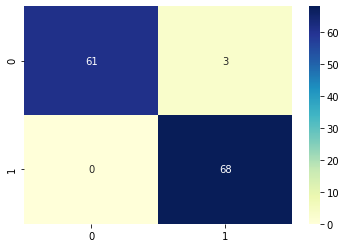

In [0]:
# train
train()